<a href="https://colab.research.google.com/github/ToshikiNakamura0412/my_ipynb_vision/blob/master/orb_feature_extraction_with_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 13.7 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.1MB/s]



image 1/1 /content/image_0.png: 384x640 10 persons, 1 bus, 454.4ms
Speed: 15.7ms preprocess, 454.4ms inference, 29.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


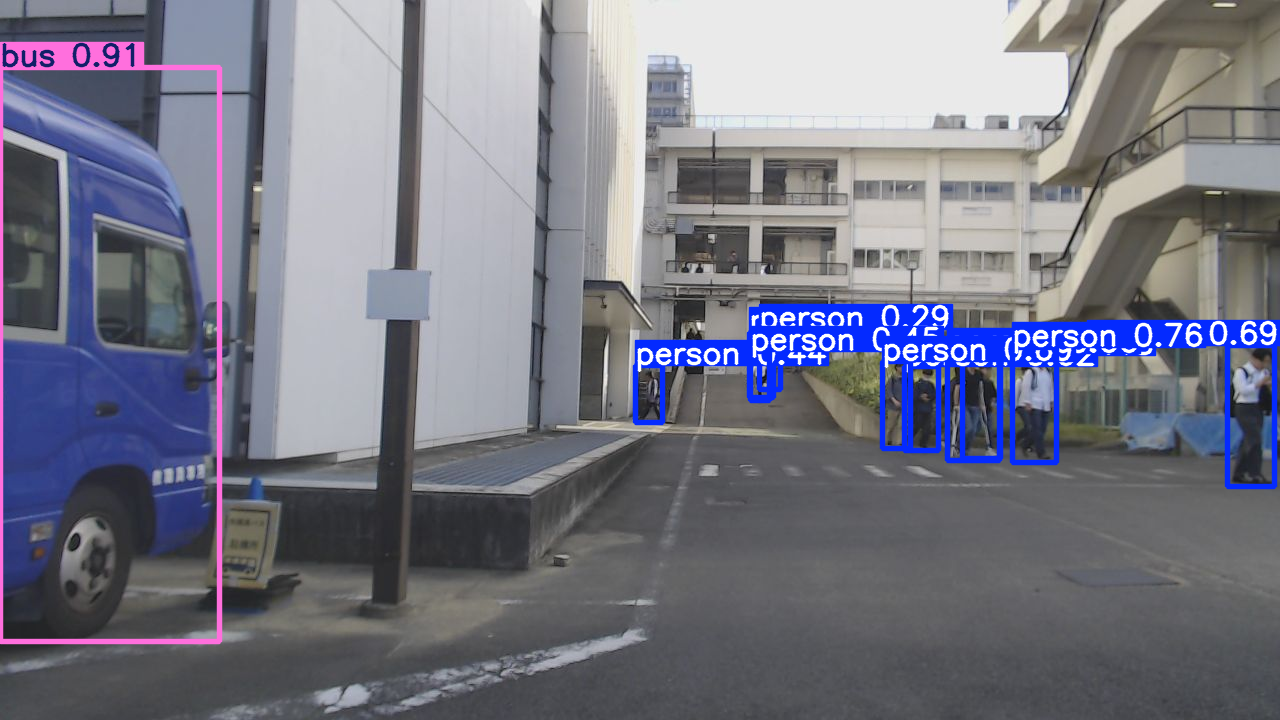

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
results = model.predict(source="image_0.png", save=True)

results[0].show()

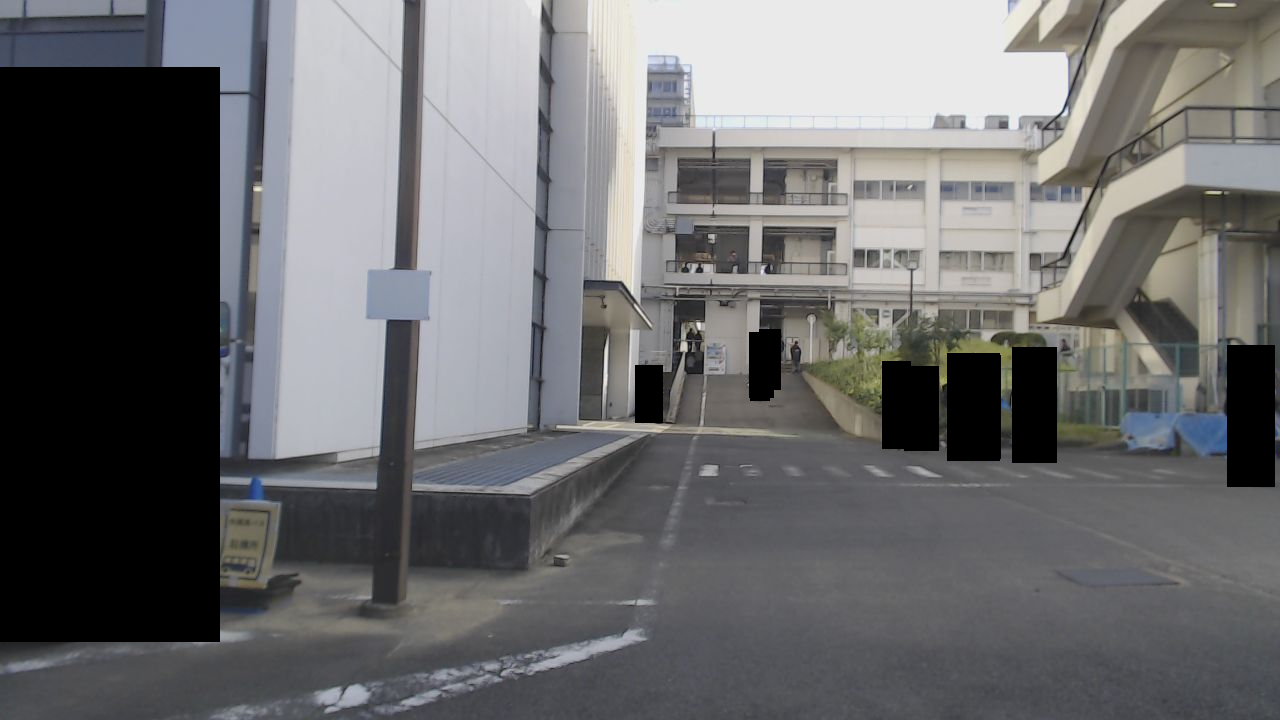

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

masked_image = cv2.imread("image_0.png")
for box in results[0].boxes:
  cv2.rectangle(masked_image, (int(box.xyxy[0][0]), int(box.xyxy[0][1])), (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (0, 0, 0), -1)

cv2_imshow(masked_image)

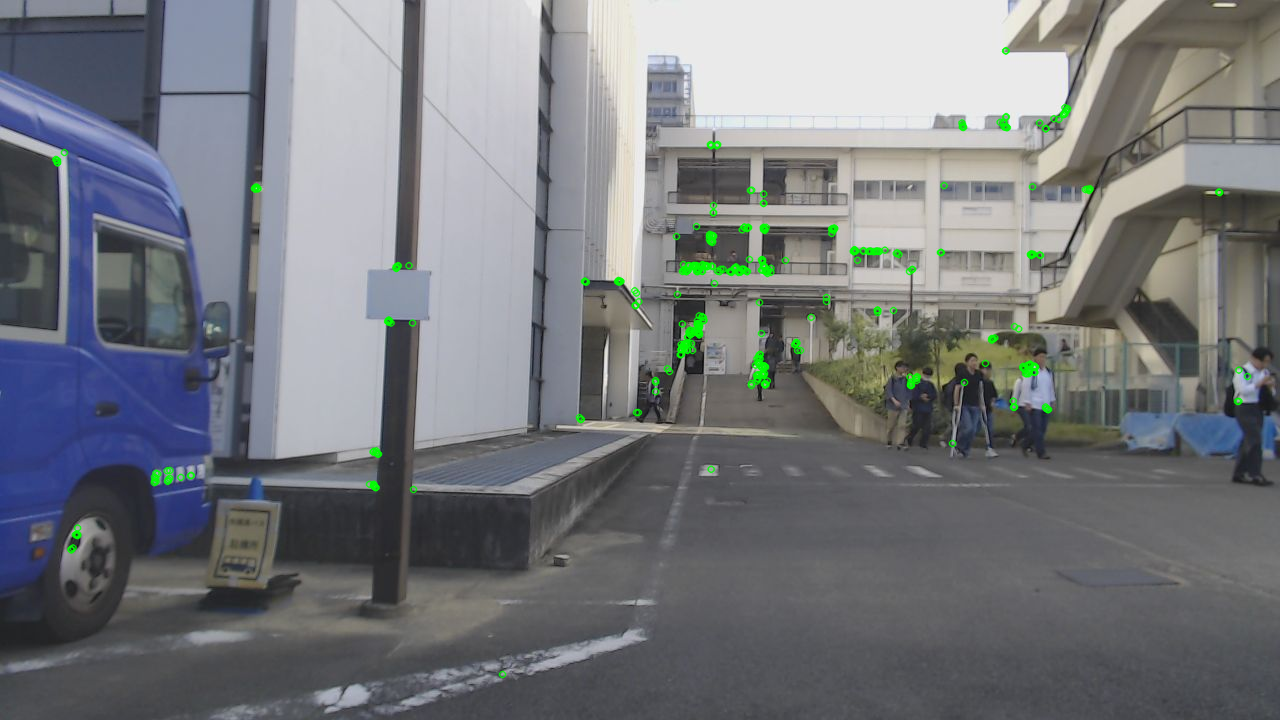

In [ ]:
img = cv2.imread("image_0.png")

orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(img, None)

img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

cv2_imshow(img_with_keypoints)

In [ ]:
import numpy as np

mask = np.full(img.shape[:2], 255, dtype=np.uint8)

for box in results[0].boxes:
  x1, y1, x2, y2 = map(int, box.xyxy[0])
  mask[y1:y2, x1:x2] = 0

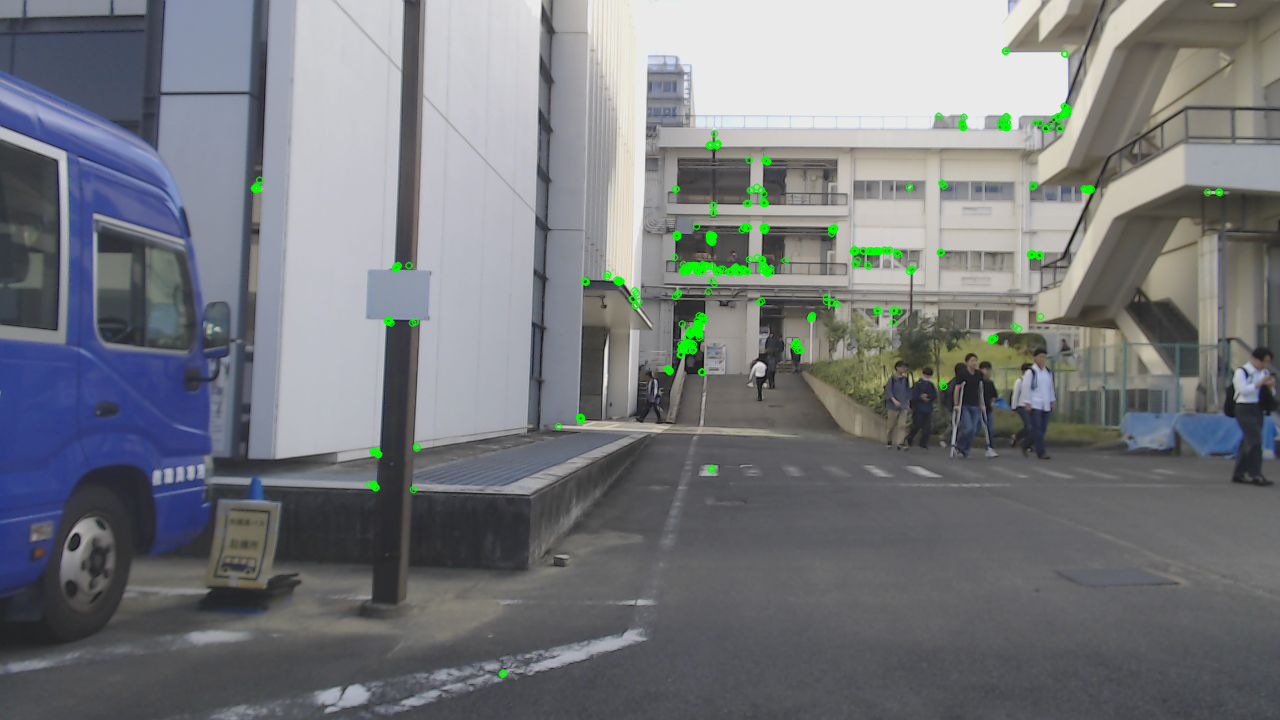

In [ ]:
keypoints, descriptors = orb.detectAndCompute(img, mask)

img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

cv2_imshow(img_with_keypoints)